## **Sesi 2,3,4**

Silakan unggah satu file gambar untuk Operasi Dasar:


Saving 2421102023-common-goldfish.jpg to 2421102023-common-goldfish (4).jpg
Saving Ikan-Mas-Koki-Hewan-Peliharaan-Sejak-Ribuan-Tahun-Silam.jpg to Ikan-Mas-Koki-Hewan-Peliharaan-Sejak-Ribuan-Tahun-Silam (4).jpg

         OPERASI DASAR & DETEKSI TEPI

1. Gambar Asli:


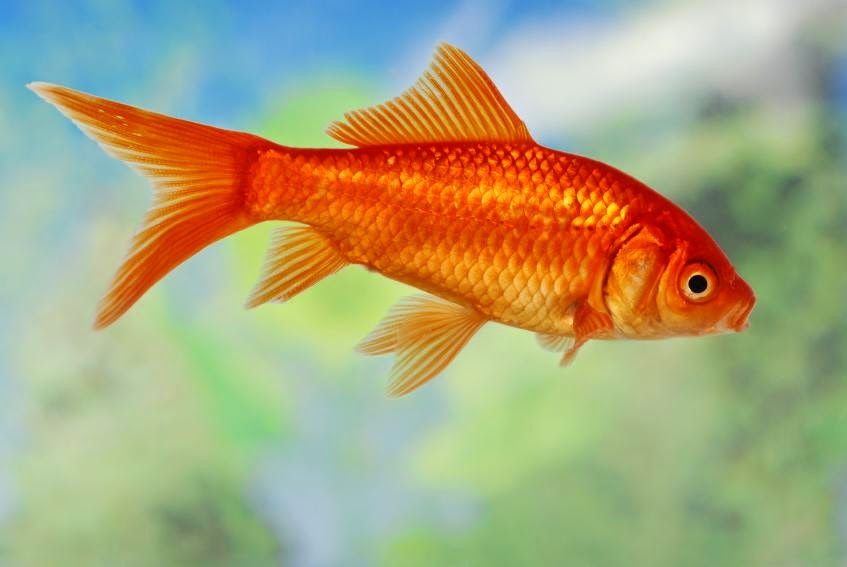


2. Hasil Thresholding Otsu (Biner):


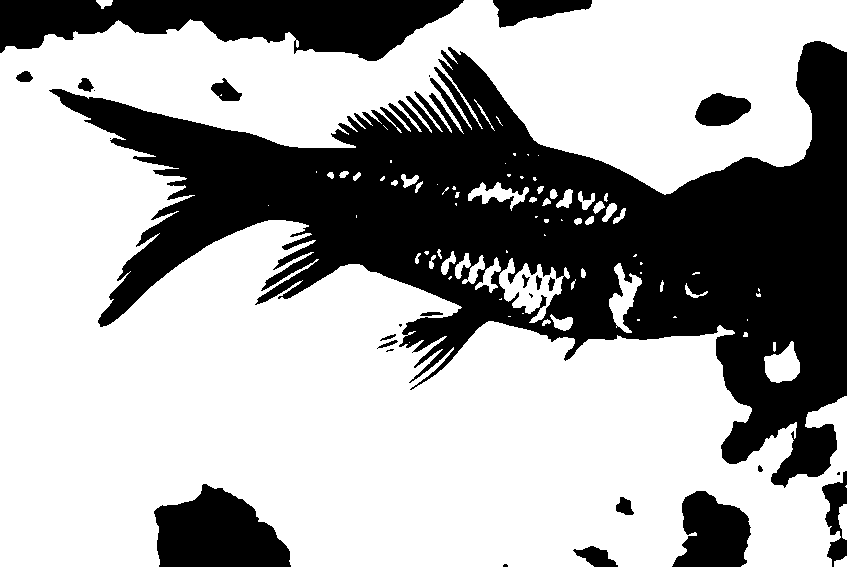


3. Hasil Canny Edge Detection:


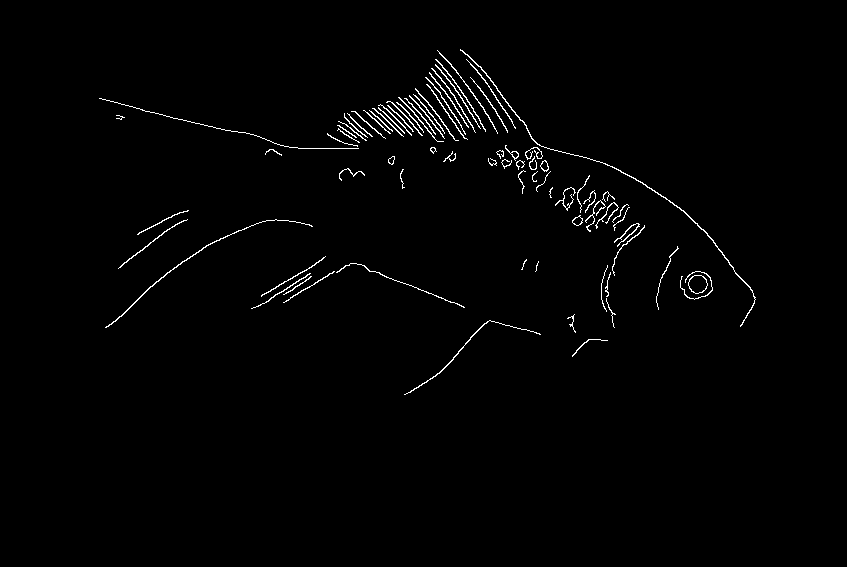


4. Hasil Kombinasi Sobel X dan Y:


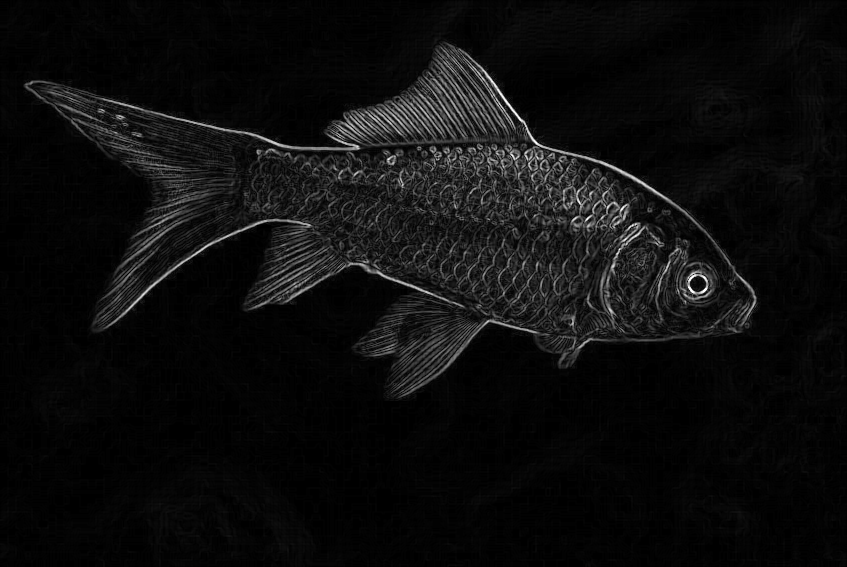

In [12]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# --- A. UPLOAD GAMBAR ---
print("Silakan unggah satu file gambar untuk Operasi Dasar:")
uploaded = files.upload()

if not uploaded:
    print("Error: Harap unggah file gambar.")
else:
    filename = next(iter(uploaded))
    img_bgr = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

    if img_bgr is None:
        print("Error: File tidak dapat dibaca sebagai gambar.")
    else:
        # Konversi ke Grayscale (Wajib untuk banyak operasi)
        gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

        # --- B. FILTERING (Materi 2, 3) ---
        # 1. Smoothing/Penghalusan dengan Filter Gaussian
        img_smooth = cv2.GaussianBlur(gray, (5, 5), 0)

        # --- C. THRESHOLDING (Materi 2, 3) ---
        # 2. Thresholding Otsu (Otomatis)
        ret, img_thresh = cv2.threshold(img_smooth, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # --- D. DETEKSI TEPI (Materi 4) ---
        # 3. Canny Edge Detection (Terbaik)
        # Nilai threshold (100, 200) dapat di tune
        img_canny = cv2.Canny(img_smooth, 100, 200)

        # 4. Sobel X & Y (Contoh Deteksi Tepi Dasar)
        img_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        img_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        img_sobel = cv2.addWeighted(cv2.convertScaleAbs(img_sobel_x), 0.5, cv2.convertScaleAbs(img_sobel_y), 0.5, 0)

        # --- E. VISUALISASI HASIL ---
        print("\n=============================================")
        print("         OPERASI DASAR & DETEKSI TEPI")
        print("=============================================")

        print("\n1. Gambar Asli:")
        cv2_imshow(img_bgr)

        print("\n2. Hasil Thresholding Otsu (Biner):")
        cv2_imshow(img_thresh)

        print("\n3. Hasil Canny Edge Detection:")
        cv2_imshow(img_canny)

        print("\n4. Hasil Kombinasi Sobel X dan Y:")
        cv2_imshow(img_sobel)

# **Sesi 5**

Silakan unggah satu file gambar untuk Deteksi Sudut:


Saving 2421102023-common-goldfish.jpg to 2421102023-common-goldfish (5).jpg

        DETEKSI SUDUT (HARRIS vs FAST)

1. Hasil Harris Corner (Sudut Merah):


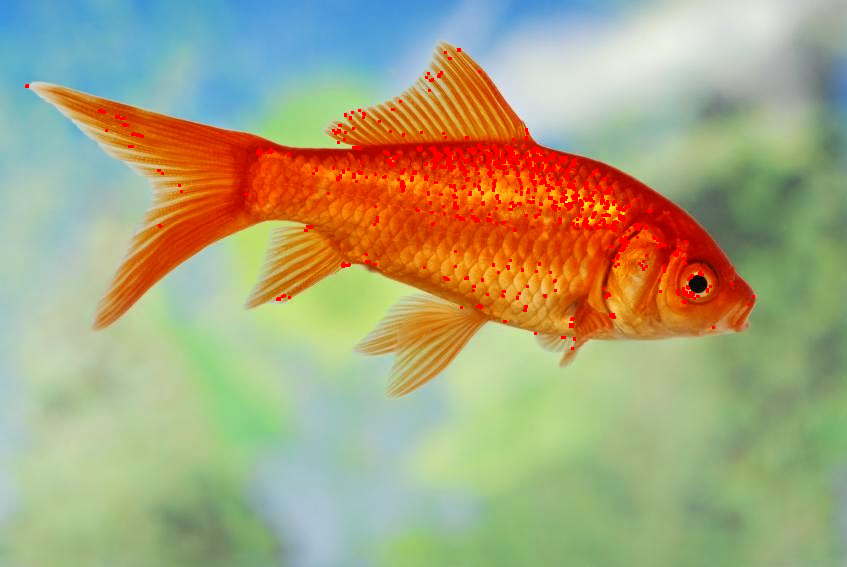


2. Hasil FAST Corner (Titik Hijau):


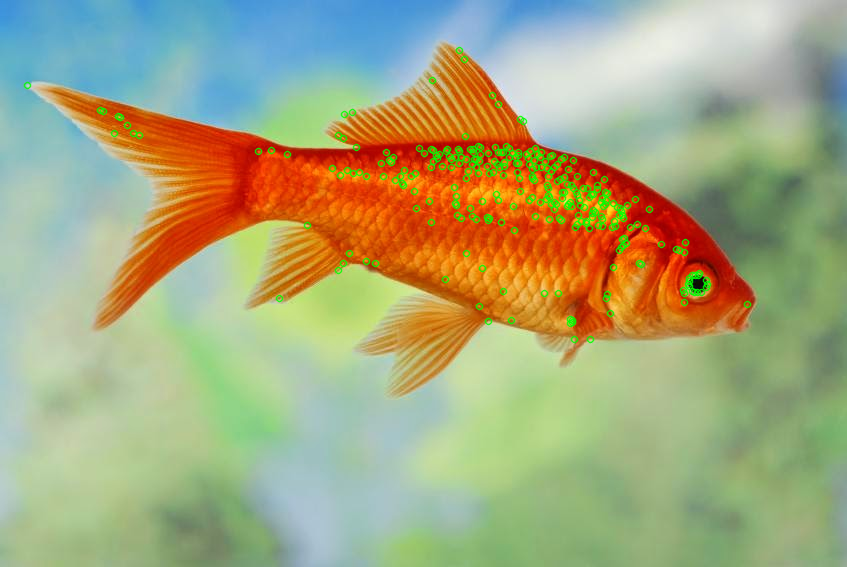

In [13]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# --- A. UPLOAD GAMBAR ---
print("Silakan unggah satu file gambar untuk Deteksi Sudut:")
uploaded = files.upload()

if not uploaded:
    print("Error: Harap unggah file gambar.")
else:
    filename = next(iter(uploaded))
    img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

    if img is None:
        print("Error: File tidak dapat dibaca sebagai gambar.")
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # --- B. HARRIS CORNER DETECTION ---
        img_harris = img.copy()
        gray_float = np.float32(gray)

        # Parameter Harris
        dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
        dst = cv2.dilate(dst, None)

        # Menandai sudut terkuat dengan warna Merah
        img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]

        # --- C. FAST CORNER DETECTION ---
        img_fast = img.copy()

        # Inisialisasi Detektor FAST
        fast = cv2.FastFeatureDetector_create(threshold=30)

        # Deteksi Keypoints
        keypoints = fast.detect(gray, None)

        # Menggambar keypoints (Titik Sudut) dengan warna Hijau
        img_fast = cv2.drawKeypoints(img_fast, keypoints, None, color=(0, 255, 0), flags=0)

        # --- D. VISUALISASI HASIL ---
        print("\n=============================================")
        print("        DETEKSI SUDUT (HARRIS vs FAST)")
        print("=============================================")

        print("\n1. Hasil Harris Corner (Sudut Merah):")
        cv2_imshow(img_harris)

        print("\n2. Hasil FAST Corner (Titik Hijau):")
        cv2_imshow(img_fast)

# **Sesi 6**

Silakan unggah DUA file: 1) Objek yang dicari, 2) Gambar Adegan:


Saving 2421102023-common-goldfish.jpg to 2421102023-common-goldfish (3).jpg
Saving Ikan-Mas-Koki-Hewan-Peliharaan-Sejak-Ribuan-Tahun-Silam.jpg to Ikan-Mas-Koki-Hewan-Peliharaan-Sejak-Ribuan-Tahun-Silam (3).jpg

  VISUALISASI 1.1: SEMUA KECOCOKAN MENTAH TERBAIK


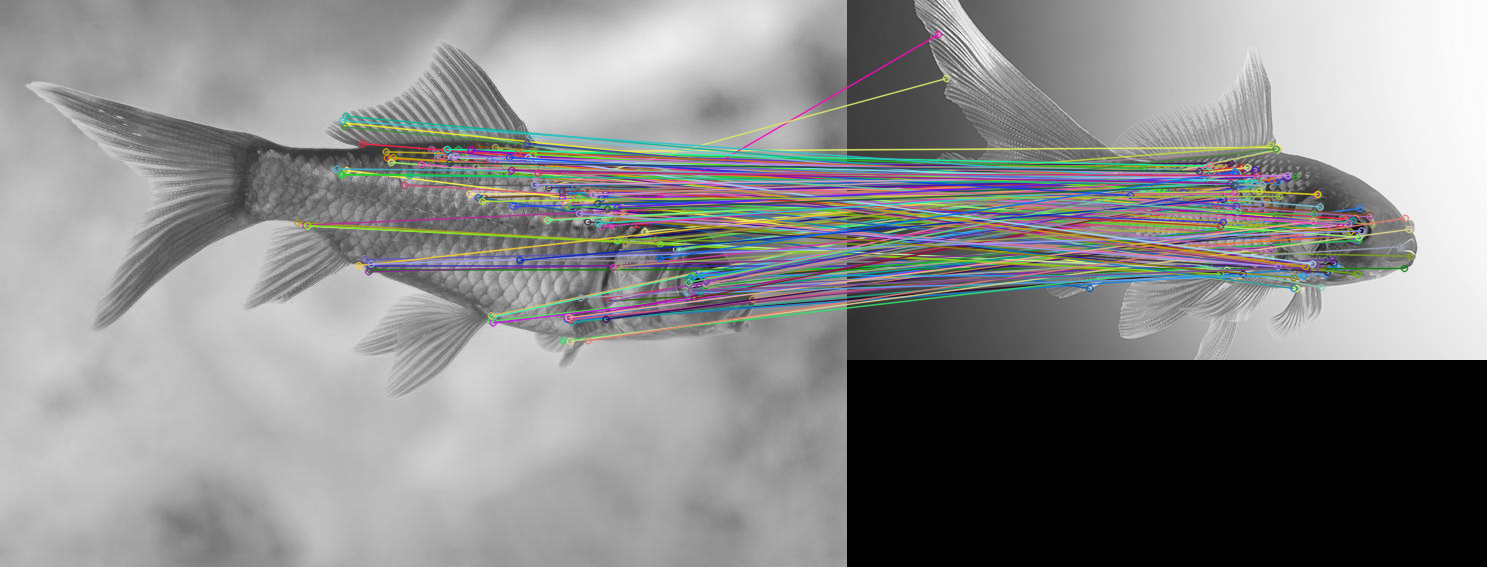


  VISUALISASI 1.2: 10 KECOCOKAN MENTAH TERBAIK


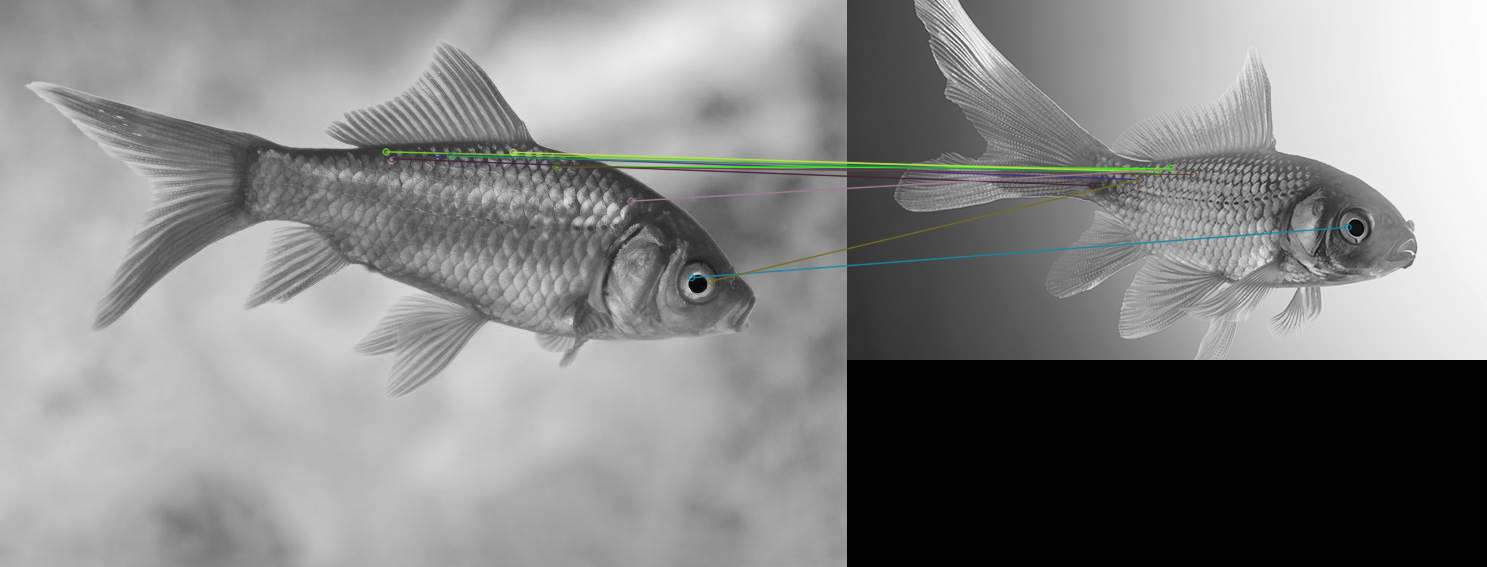


  VISUALISASI 2: KECOCOKAN INLIER (Setelah RANSAC)


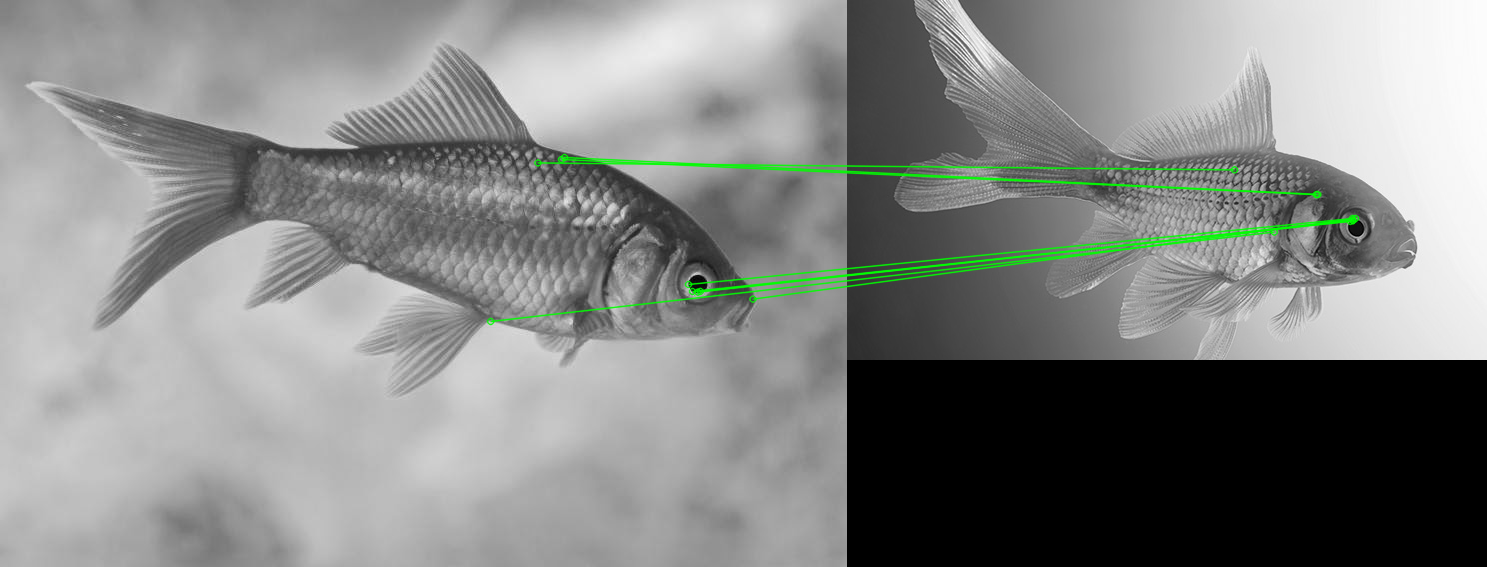


--- ANALISIS ---
Total Waktu Komputasi: 0.3950 detik
Total Kecocokan Mentah yang Diuji: 217
Total Kecocokan Inlier (Match Benar) Setelah RANSAC: 9


In [11]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import time

# --- A. UPLOAD DUA GAMBAR ---
print("Silakan unggah DUA file: 1) Objek yang dicari, 2) Gambar Adegan:")
uploaded = files.upload()

if len(uploaded) < 2:
    print("Error: Harap unggah minimal dua file gambar.")
else:
    file_names = list(uploaded.keys())

    # Muat kedua gambar dalam grayscale
    img_obj = cv2.imdecode(np.frombuffer(uploaded[file_names[0]], np.uint8), cv2.IMREAD_GRAYSCALE)
    img_scene = cv2.imdecode(np.frombuffer(uploaded[file_names[1]], np.uint8), cv2.IMREAD_GRAYSCALE)

    if img_obj is None or img_scene is None:
        print("Error: File tidak dapat dibaca sebagai gambar.")
    else:
        img_obj_color = cv2.cvtColor(img_obj, cv2.COLOR_GRAY2BGR)
        img_scene_color = cv2.cvtColor(img_scene, cv2.COLOR_GRAY2BGR)

        MAX_FEATURES = 1000
        RANSAC_THRESH = 3.0 # Tuning yang ketat untuk RANSAC

        # --- ALGORITMA ORB (Deteksi & Deskripsi) ---
        start_time = time.time()

        orb = cv2.ORB_create(nfeatures=MAX_FEATURES)
        kp_obj, des_obj = orb.detectAndCompute(img_obj, None)
        kp_scene, des_scene = orb.detectAndCompute(img_scene, None)

        if des_obj is not None and des_scene is not None and len(des_obj) >= 4 and len(des_scene) >= 4:

            # --- B. PENCARIAN RAW MATCHES (Brute-Force Matcher) ---

            # Gunakan Brute-Force Matcher (NORM_HAMMING untuk ORB Biner, crossCheck=True untuk raw matches yang lebih baik)
            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches_raw = bf.match(des_obj, des_scene)
            matches_raw = sorted(matches_raw, key = lambda x:x.distance)

            # VISUALISASI 1: Semua Kecocokan Mentah
            img_raw_matches = cv2.drawMatches(img_obj_color, kp_obj, img_scene_color, kp_scene,
                                              matches_raw, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

            print("\n=============================================")
            print("  VISUALISASI 1.1: SEMUA KECOCOKAN MENTAH TERBAIK")
            print("=============================================")
            cv2_imshow(img_raw_matches)

            print("\n=============================================")
            print("  VISUALISASI 1.2: 10 KECOCOKAN MENTAH TERBAIK")
            print("=============================================")

            img_raw_matches_ten = cv2.drawMatches(img_obj_color, kp_obj, img_scene_color, kp_scene,
                                              matches_raw[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

            cv2_imshow(img_raw_matches_ten)


            # --- C. PENYARINGAN RANSAC (Mencari Inlier) ---

            # 1. Persiapan data untuk RANSAC (menggunakan semua raw matches yang diurutkan)
            src_pts = np.float32([ kp_obj[m.queryIdx].pt for m in matches_raw ]).reshape(-1,1,2)
            dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in matches_raw ]).reshape(-1,1,2)

            # 2. Hitung Homografi & Masker Inlier menggunakan RANSAC
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, RANSAC_THRESH)

            # 3. Visualisasi Inlier (Garis Hijau)
            draw_params = dict(matchColor = (0,255,0), # Inlier Hijau
                               singlePointColor = None,
                               matchesMask = mask.ravel().tolist(), # Masker Inlier dari RANSAC
                               flags = 2)

            img_ransac_inlier = cv2.drawMatches(img_obj_color, kp_obj, img_scene_color, kp_scene,
                                                matches_raw, None, **draw_params)

            inliers = np.sum(mask)

            end_time = time.time()

            # --- D. VISUALISASI HASIL AKHIR ---
            print("\n=============================================")
            print("  VISUALISASI 2: KECOCOKAN INLIER (Setelah RANSAC)")
            print("=============================================")
            cv2_imshow(img_ransac_inlier)

            print("\n--- ANALISIS ---")
            print(f"Total Waktu Komputasi: {end_time - start_time:.4f} detik")
            print(f"Total Kecocokan Mentah yang Diuji: {len(matches_raw)}")
            print(f"Total Kecocokan Inlier (Match Benar) Setelah RANSAC: {inliers}")

        else:
            print("Tidak ada fitur yang cukup terdeteksi untuk RANSAC.")